# Bagging & Boosting KNN & Stacking 


# Question 1
**Question:** What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?

**Answer:**

**Fundamental idea:** Ensemble techniques combine multiple models (often called *base learners* or *weak learners*) to produce a single, stronger predictive model. The core motivations are:
- Reduce variance (by averaging multiple models).
- Reduce bias (by sequentially correcting errors).
- Improve robustness and generalization compared to any single model.
- Combine diverse inductive biases to exploit complementary strengths.

**Bagging (Bootstrap Aggregating):**
- Approach: Train multiple base learners in parallel on different bootstrap samples (random samples with replacement) of the training data. Predictions are combined by averaging (regression) or majority voting (classification).
- Objective: Reduce variance and prevent overfitting. Each base learner tends to have high variance (e.g., decision trees), and aggregating them stabilizes predictions.
- Key property: Base learners are independent (trained in parallel). Diversity mainly comes from data resampling and often feature subsetting (e.g., Random Forest).

**Boosting:**
- Approach: Train base learners sequentially; each learner tries to correct mistakes made by previous learners. Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost.
- Objective: Reduce bias by focusing subsequent learners on the errors of earlier ones. The final model is a weighted sum of base learners.
- Key property: Learners are dependent (sequential). Boosting can reduce both bias and variance, but is more prone to overfitting if not regularized well.

**Summary table:**

| Aspect | Bagging | Boosting |
|---|---:|---|
| Training | Parallel (independent) | Sequential (dependent) |
| Goal | Reduce variance | Reduce bias (and some variance) |
| How diversity is achieved | Resampling + feature randomness | Focusing on previously mispredicted instances |
| Example methods | Random Forest | AdaBoost, GradientBoosting, XGBoost, CatBoost |



# Question 2
**Question:** Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

**Answer:**

A single decision tree tends to overfit because it can grow very deep and create complex decision boundaries that fit noise. Random Forest reduces overfitting by averaging many decision trees trained on different variations of the data, which decreases variance without increasing bias much.

Mechanisms:
- **Bootstrap sampling:** Each tree is trained on a bootstrap sample (random sampling with replacement), so trees see different subsets of the data.
- **Feature randomness (feature subsetting):** At each split, a random subset of features is considered (not all features). This decorrelates trees so that errors across trees are less likely to align, improving the variance reduction through averaging.

Two important hyperparameters:
1. **n_estimators** — number of trees in the forest. More trees typically reduce variance and stabilize predictions (diminishing returns beyond a point). Larger values increase robustness but also increase computation.
2. **max_features** — number (or fraction) of features to consider when looking for the best split. Smaller values increase randomness (decorrelation) and reduce variance; too small can increase bias. Common choices: `'sqrt'` for classification, `'log2'`, or a fixed integer.

Other hyperparameters that help avoid overfitting: `max_depth` (limit tree depth), `min_samples_split`, `min_samples_leaf` (require a minimum number of samples to split or be a leaf), and `bootstrap` (enable/disable bootstrap sampling).

In short, Random Forest trades increased ensemble complexity for better generalization by averaging many decorrelated trees.



# Question 3
**Question:** What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

**Answer:**

**Stacking (stacked generalization):** An ensemble method where multiple base-level models (level-0 learners) are trained on the training data, and their predictions are used as features to train a higher-level model (meta-learner or level-1 learner). The meta-model learns how to best combine the base learners' outputs.

Key differences from bagging/boosting:
- **Combination strategy:** Bagging aggregates by averaging/voting; boosting combines sequential learners with weighted sums. Stacking trains an explicit meta-learner that learns how to weight / combine base models' predictions.
- **Independence / sequential nature:** Base models in stacking can be trained in parallel (like bagging) but there's an extra step to create meta-features (usually using cross-validated predictions to avoid leakage). Boosting is inherently sequential and modifies the training distribution.
- **Flexibility:** Stacking allows heterogenous base learners (e.g., logistic regression, random forest, SVM) and a meta-learner (e.g., linear model or gradient booster) to combine their strengths.

**Simple example use case:** For a classification problem, train three base learners — a Logistic Regression, Random Forest, and XGBoost. Use stratified K-fold CV on the training set to generate out-of-fold predictions from each base learner (these become new features). Train a meta-learner such as Logistic Regression on these predictions. The final pipeline often yields improved generalization because the meta-learner captures complementary strengths of base learners.



# Question 4
**Question:** What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

**Answer:**

**OOB (Out-Of-Bag) score:** When training each tree in a Random Forest, a bootstrap sample (sampling with replacement) of the training set is used. On average, about 63% of the samples are included in a given bootstrap sample; the remaining ~37% are not included — these are the *out-of-bag* samples for that tree. The OOB score is computed by aggregating predictions for each training instance using only the trees where that instance was out-of-bag, and then comparing aggregated predictions to the true labels.

**Why useful:** It provides an internal estimate of generalization error without requiring an explicit validation set or cross-validation, saving data for training. OOB estimation is especially handy when data is limited.

**How it helps:** For each training sample `x_i`, we can average predictions from trees that did not see `x_i` during training to form an unbiased estimate of how the ensemble would predict on unseen data. Aggregating errors over all training samples yields an estimate of test-set performance (e.g., accuracy). It's not a perfect substitute for a separate validation set or cross-validation for hyperparameter tuning, but it's a fast and convenient internal check.



# Question 5
**Question:** Compare AdaBoost and Gradient Boosting in terms of:
- How they handle errors from weak learners
- Weight adjustment mechanism
- Typical use cases

**Answer:**

**AdaBoost (Adaptive Boosting):**
- **Error handling:** AdaBoost trains base learners sequentially. After each iteration, it increases the weights of misclassified samples so subsequent learners focus more on hard examples.
- **Weight adjustment:** AdaBoost maintains sample weights. The weighted error rate of the learner determines its contribution (alpha) to the final ensemble. Misclassified instances' weights are multiplied by a factor (exponential update) to increase their importance.
- **Use cases:** Works well with simple base learners (stumps). Historically used for binary classification, robust to noise to some degree but can be sensitive to outliers because it focuses heavily on hard-to-classify samples.

**Gradient Boosting:**
- **Error handling:** Gradient Boosting views boosting as gradient descent in function space. At each iteration, it fits a new learner to the negative gradient (residuals) of the loss function with respect to current predictions.
- **Weight adjustment:** There are no explicit sample weights as in AdaBoost; instead the model fits residuals. The learner is added with a learning rate (shrinkage) that scales its contribution.
- **Use cases:** Flexible — can optimize arbitrary differentiable loss functions (regression, classification, ranking). Popular implementations (XGBoost, LightGBM, CatBoost) are used in competitions and production for tabular data.

**Summary differences:**
- AdaBoost adjusts sample weights explicitly; gradient boosting fits residuals (functional gradient step).
- Gradient boosting is more general and can be regularized via `learning_rate`, tree constraints, and subsampling; AdaBoost is simpler and often uses stumps as weak learners.



# Question 6
**Question:** Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.

**Answer:**

CatBoost uses specialized techniques to handle categorical variables natively and effectively, avoiding naive one-hot encoding which can blow up dimensionality and cause overfitting.

Key ideas:
- **Ordered target statistics / permutation-driven encoding:** CatBoost computes statistics (e.g., target mean) for categories using an ordered scheme that avoids target leakage. It uses permutations of the dataset and calculates category statistics using only preceding examples in the permutation, preventing the model from seeing the target for the same row when computing its encoding.
- **Combining categories:** CatBoost can form combinations of categorical features (feature crosses) efficiently to capture interactions.
- **Robust regularization:** The encoding includes a prior (smoothing) and random noise to reduce overfitting for rare categories.
- **Efficient implementation:** Built-in handling avoids creating huge sparse matrices (as with naive one-hot) and scales well.

Because of these techniques, CatBoost often performs well out-of-the-box on datasets with many categorical features, requiring minimal preprocessing.


## Question 7 — KNN Classifier Assignment: Wine Dataset Analysis with Optimization


In [1]:

# Question 7 - KNN Classifier Assignment: Wine Dataset Analysis with Optimization
# Full pipeline: load data, train KNN unscaled, scaled, use GridSearchCV to tune K and metric,
# and compare results.

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
class_names = wine.target_names

# 2. Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 3. Train a KNN classifier (default K=5) without scaling
knn_default = KNeighborsClassifier(n_neighbors=5, metric='minkowski')  # default
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)

acc_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default, target_names=class_names)

print('--- KNN (unscaled, k=5) ---')
print('Accuracy:', acc_default)
print(report_default)

# 4. Scale using StandardScaler, retrain KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

acc_scaled = accuracy_score(y_test, y_pred_scaled)
report_scaled = classification_report(y_test, y_pred_scaled, target_names=class_names)

print('--- KNN (scaled, k=5) ---')
print('Accuracy:', acc_scaled)
print(report_scaled)

# 5. GridSearchCV to find best K (1-20) and distance metric (Euclidean, Manhattan)
param_grid = {
    'n_neighbors': list(range(1,21)),
    'metric': ['minkowski','manhattan'],  # minkowski with p=2 is Euclidean; manhattan uses L1
    'p': [2, 1]  # p=2 for Euclidean, p=1 for Manhattan (used when metric='minkowski')
}

# We will use a KNN estimator and GridSearchCV on scaled data
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': param_grid['n_neighbors'], 'metric': ['minkowski','manhattan'], 'p': [1,2]}, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print('Best params from GridSearchCV:', grid.best_params_)
print('Best CV score:', grid.best_score_)

# 6. Train optimized KNN and compare results
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
acc_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best, target_names=class_names)

print('--- KNN (optimized on scaled data) ---')
print('Accuracy:', acc_best)
print(report_best)


--- KNN (unscaled, k=5) ---
Accuracy: 0.7222222222222222
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        18
     class_1       0.78      0.67      0.72        21
     class_2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

--- KNN (scaled, k=5) ---
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params from GridSearchCV: {'metric': 'minkowski', 'n_neighbors': 4, 'p': 1}
Best CV score: 0.9756666666666666
--- KNN (op

## Question 8 — PCA + KNN with Variance Analysis and Visualization


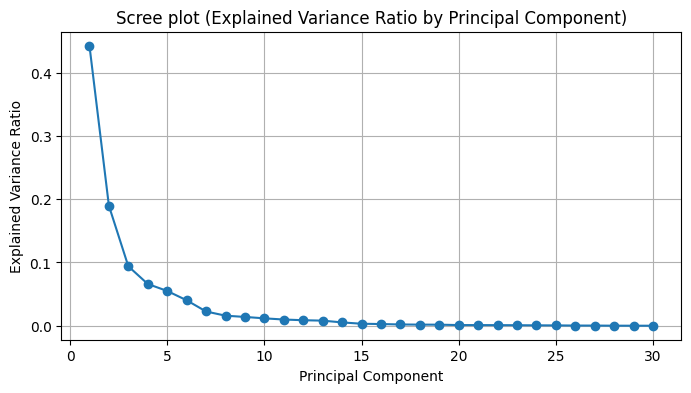

Number of components to retain 95% variance: 10
Accuracy (KNN on original scaled data): 0.9707602339181286
Accuracy (KNN on PCA-transformed data - 95% variance): 0.9473684210526315


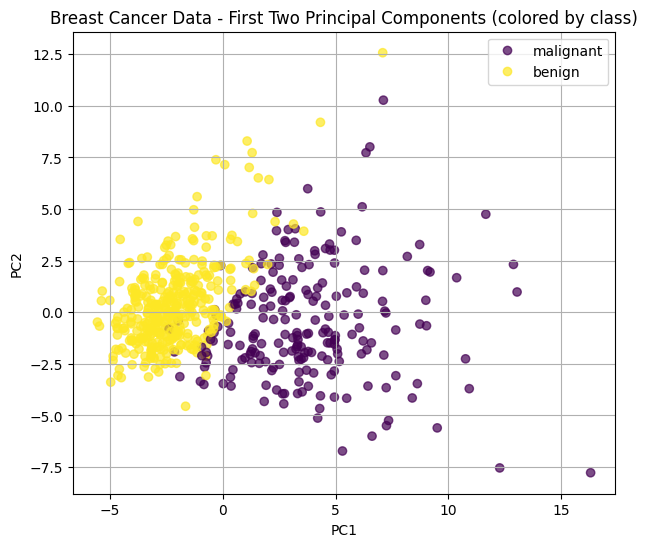

In [2]:

# Question 8 - PCA + KNN with Variance Analysis and Visualization
# 1. Load Breast Cancer dataset, apply PCA and scree plot, retain 95% variance, transform,
#    train KNN on original and PCA-transformed data, compare accuracy, visualize first 2 PCs.

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scree plot using PCA without specifying n_components
pca_full = PCA()
pca_full.fit(X_scaled)
explained_ratio = pca_full.explained_variance_ratio_

# Plot scree plot
plt.figure(figsize=(8,4))
plt.plot(np.arange(1, len(explained_ratio)+1), explained_ratio, marker='o')
plt.title('Scree plot (Explained Variance Ratio by Principal Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Retain 95% variance
pca_95 = PCA(n_components=0.95, svd_solver='full')  # keeps enough components to explain 95% variance
X_pca = pca_95.fit_transform(X_scaled)
n_components_95 = pca_95.n_components_

print('Number of components to retain 95% variance:', n_components_95)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)
Xp_train, Xp_test, _, _ = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

# Train KNN on original scaled data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train, y_train)
y_pred_orig = knn_orig.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred_orig)

# Train KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(Xp_train, y_train)
y_pred_pca = knn_pca.predict(Xp_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

print('Accuracy (KNN on original scaled data):', acc_orig)
print('Accuracy (KNN on PCA-transformed data - 95% variance):', acc_pca)

# Visualize first two principal components
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_pca2[:,0], X_pca2[:,1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Breast Cancer Data - First Two Principal Components (colored by class)')
plt.legend(handles=scatter.legend_elements()[0], labels=['malignant','benign'])
plt.grid(True)
plt.show()


## Question 9 — KNN Regressor with Distance Metrics and K-Value Analysis


MSE (Euclidean, K=5): 4803.90558674207
MSE (Manhattan, K=5): 5210.225816542467


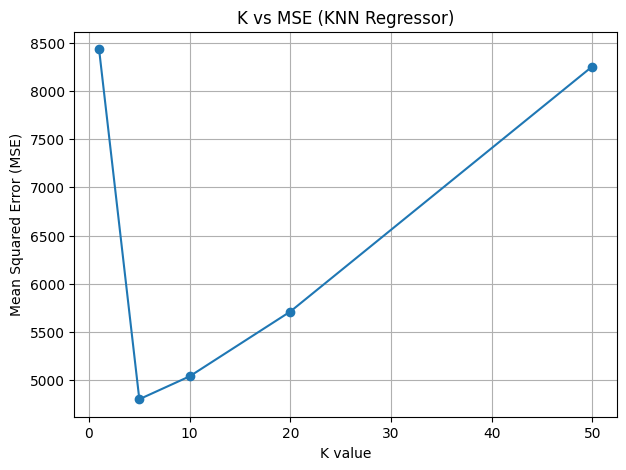

K=1 -> MSE=8430.4212
K=5 -> MSE=4803.9056
K=10 -> MSE=5041.1077
K=20 -> MSE=5712.0191
K=50 -> MSE=8251.3713


In [3]:

# Question 9 - KNN Regressor with Distance Metrics and K-Value Analysis
# 1. Generate synthetic regression dataset, train KNN regressors with Euclidean and Manhattan distances,
#    compare MSE. Then test different Ks and plot K vs MSE.

import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Generate dataset
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 2. Train KNN regressor with Euclidean (p=2) and Manhattan (p=1), K=5
knn_euclid = KNeighborsRegressor(n_neighbors=5, p=2, metric='minkowski')
knn_euclid.fit(X_train, y_train)
pred_e = knn_euclid.predict(X_test)
mse_e = mean_squared_error(y_test, pred_e)

knn_manh = KNeighborsRegressor(n_neighbors=5, p=1, metric='minkowski')
knn_manh.fit(X_train, y_train)
pred_m = knn_manh.predict(X_test)
mse_m = mean_squared_error(y_test, pred_m)

print('MSE (Euclidean, K=5):', mse_e)
print('MSE (Manhattan, K=5):', mse_m)

# 3. Test Ks = [1,5,10,20,50] and plot K vs MSE
Ks = [1,5,10,20,50]
mses = []
for k in Ks:
    knn = KNeighborsRegressor(n_neighbors=k, p=2)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    mses.append(mean_squared_error(y_test, preds))

plt.figure(figsize=(7,5))
plt.plot(Ks, mses, marker='o')
plt.xlabel('K value')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs MSE (KNN Regressor)')
plt.grid(True)
plt.show()

for k,m in zip(Ks, mses):
    print(f'K={k} -> MSE={m:.4f}')


## Question 10 — KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data


           train_time  accuracy
brute        0.000736  0.735931
kd_tree      0.001658  0.735931
ball_tree    0.003479  0.735931
Best algorithm by accuracy: brute
Top 2 features by mutual information: ['Glucose', 'BMI']


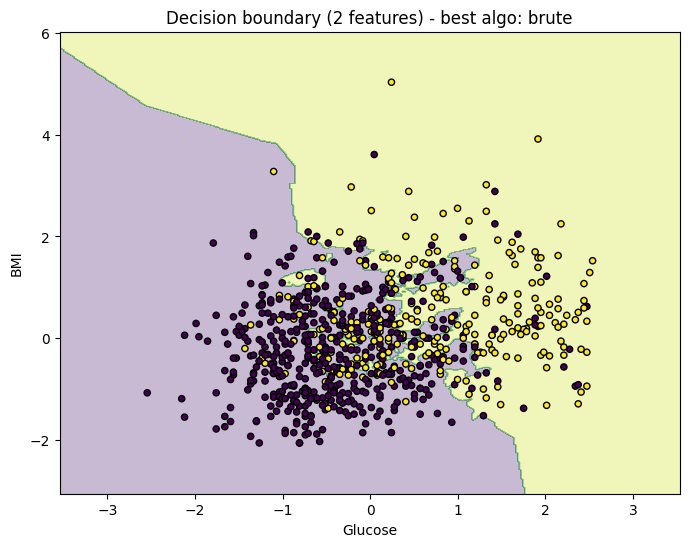

In [4]:

# Question 10 - KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data (Pima Indians Diabetes)
# Steps:
# 1. Load dataset from provided URL (diabetes.csv)
# 2. Use KNNImputer to fill missing values (assuming missing values encoded as zeros in some columns)
# 3. Train KNN using brute-force, kd_tree, ball_tree and compare training time and accuracy
# 4. Plot decision boundary for best-performing method using two most important features (we'll use a simple feature importance proxy: univariate feature scores)

import time
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# 1. Load dataset
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)

# Quick look
# The Pima dataset sometimes encodes missing values as zeros in certain columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI).
cols_with_zeros = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
# Replace zeros with NaN for imputation
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# 2. KNN Imputation
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)

# Prepare X and y
X = df_imputed.drop('Outcome', axis=1).values
y = df_imputed['Outcome'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

# 3. Train KNN using brute-force, kd_tree, ball_tree and compare training time and accuracy
algorithms = ['brute','kd_tree','ball_tree']
results = {}
for algo in algorithms:
    clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    t0 = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - t0
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[algo] = {'train_time': train_time, 'accuracy': acc}

results_df = pd.DataFrame(results).T
print(results_df)

# 4. Decision boundary for best-performing method (based on accuracy)
best_algo = results_df['accuracy'].idxmax()
print('Best algorithm by accuracy:', best_algo)
best_clf = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
best_clf.fit(X_train, y_train)

# Choose two most important features using mutual information (on imputed unscaled df)
X_full = df_imputed.drop('Outcome', axis=1)
mi = mutual_info_classif(X_full, df_imputed['Outcome'], random_state=42)
mi_series = pd.Series(mi, index=X_full.columns).sort_values(ascending=False)
top2 = list(mi_series.index[:2])
print('Top 2 features by mutual information:', top2)

# Reduce dataset to top 2 features for plotting decision boundary
X2 = df_imputed[top2].values
# scale these two features
X2_scaled = scaler.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y, test_size=0.30, random_state=42, stratify=y)

clf_2d = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
clf_2d.fit(X2_train, y2_train)

# Plot decision boundary
h = 0.02
x_min, x_max = X2_scaled[:, 0].min() - 1, X2_scaled[:, 0].max() + 1
y_min, y_max = X2_scaled[:, 1].min() - 1, X2_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X2_scaled[:,0], X2_scaled[:,1], c=y, edgecolor='k', s=20)
plt.xlabel(top2[0])
plt.ylabel(top2[1])
plt.title(f'Decision boundary (2 features) - best algo: {best_algo}')
plt.show()
